In [1]:
import scanpy as sc
import episcanpy.api as epi
import numpy as np
import anndata as ad
import random
import copy
import pandas as pd

sc.settings.set_figure_params(dpi=80, color_map='gist_earth')

/home/icb/anna.danese/miniconda3/lib/python3.7/site-packages/anndata/_core/anndata.py:21: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import RangeIndex
/home/icb/anna.danese/.local/lib/python3.7/site-packages/scanpy/api/__init__.py:7: FutureWarning: 

In a future version of Scanpy, `scanpy.api` will be removed.
Simply use `import scanpy as sc` and `import scanpy.external as sce` instead.

  FutureWarning,


### Loading 10x data

In [2]:
adata10x = ad.read('./integration_resubmission/gene_activity_10x_large_200k_transcripts.h5ad')
adata10x.var_names_make_unique()
adata10x

AnnData object with n_obs × n_vars = 3739 × 4101 
    obs: 'filter_barcode_cellranger', 'nb_features', 'log_nb_features'
    var: 'gene_id', 'transcript_id', 'gene_type', 'gene_name', 'transcript_type', 'transcript_name', 'protein_id'

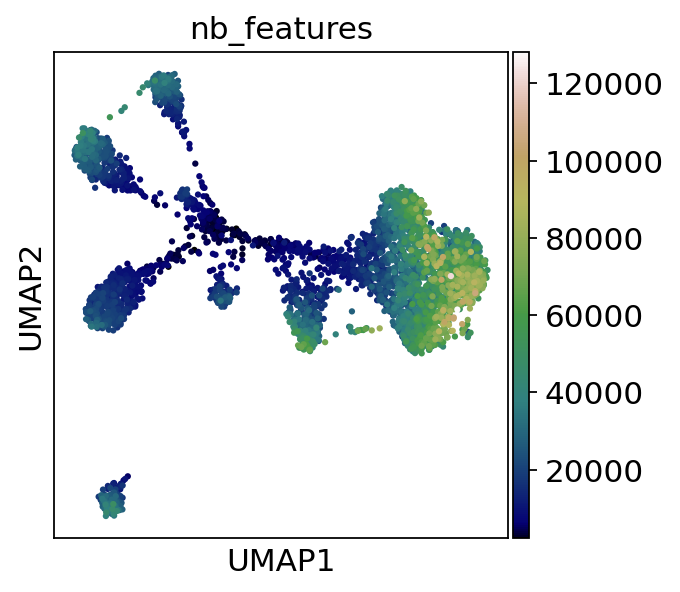

In [50]:
adata10x2 = adata10x.copy()
epi.pp.normalize_per_cell(adata10x2)
epi.pp.log1p(adata10x2)
epi.pp.lazy(adata10x2)
sc.pl.umap(adata10x2, color=['nb_features'], wspace=0.3)

### Loading Fang et al. data

In [32]:
adatafang = ad.read('./integration_resubmission/gene_activity_fang_large_200k_transcripts.h5ad')
adatafang.var_names_make_unique()
adatafang

AnnData object with n_obs × n_vars = 64079 × 3976 
    obs: 'batch', 'batchname_Fang', 'nb_features', 'log_nb_features'
    var: 'gene_id', 'transcript_id', 'gene_type', 'gene_name', 'transcript_type', 'transcript_name', 'protein_id'

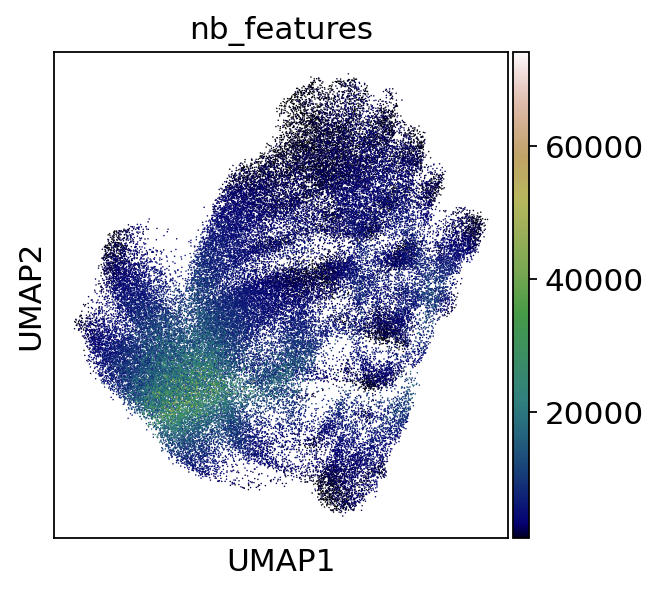

In [51]:
adatafang2 = adatafang.copy()
epi.pp.normalize_per_cell(adatafang2)
epi.pp.log1p(adatafang2)
epi.pp.lazy(adatafang2)
sc.pl.umap(adatafang2, color=['nb_features'], wspace=0.3)

### Loading Cusanovich et al. data

In [4]:
adatacus = ad.read('./integration_resubmission/gene_activity_cus_large_200k_transcripts.h5ad')
adatacus.var_names_make_unique()
adatacus

AnnData object with n_obs × n_vars = 18185 × 4150 
    obs: 'batch', 'batchname', 'batchname_Cusanovich', 'nb_features'
    var: 'gene_id', 'transcript_id', 'gene_type', 'gene_name', 'transcript_type', 'transcript_name', 'protein_id'

In [ ]:
adatacus2 = adatacus.copy()
epi.pp.normalize_per_cell(adatacus2)
epi.pp.log1p(adatacus2)
epi.pp.lazy(adatacus2)
sc.pl.umap(adatacus2, color=['nb_features'], wspace=0.3)

### Merging datasets

In [5]:
adatamerged = adata10x.concatenate(adatafang)

batchname=copy.copy(adatamerged.obs['batch'])
batchname

batchname = batchname.map({ '1' : 'Fang et al.', '0' : '10x Genomics' })
batchname

adatamerged.obs['batchname'] = batchname
adatamerged

AnnData object with n_obs × n_vars = 67818 × 3720 
    obs: 'batch', 'batchname_Fang', 'filter_barcode_cellranger', 'log_nb_features', 'nb_features', 'batchname'
    var: 'gene_id-0', 'transcript_id', 'gene_type', 'gene_name-0', 'transcript_type', 'transcript_name', 'protein_id-0', 'gene_id-1', 'gene_name-1', 'protein_id-1'

... storing 'batchname_Fang' as categorical
... storing 'filter_barcode_cellranger' as categorical


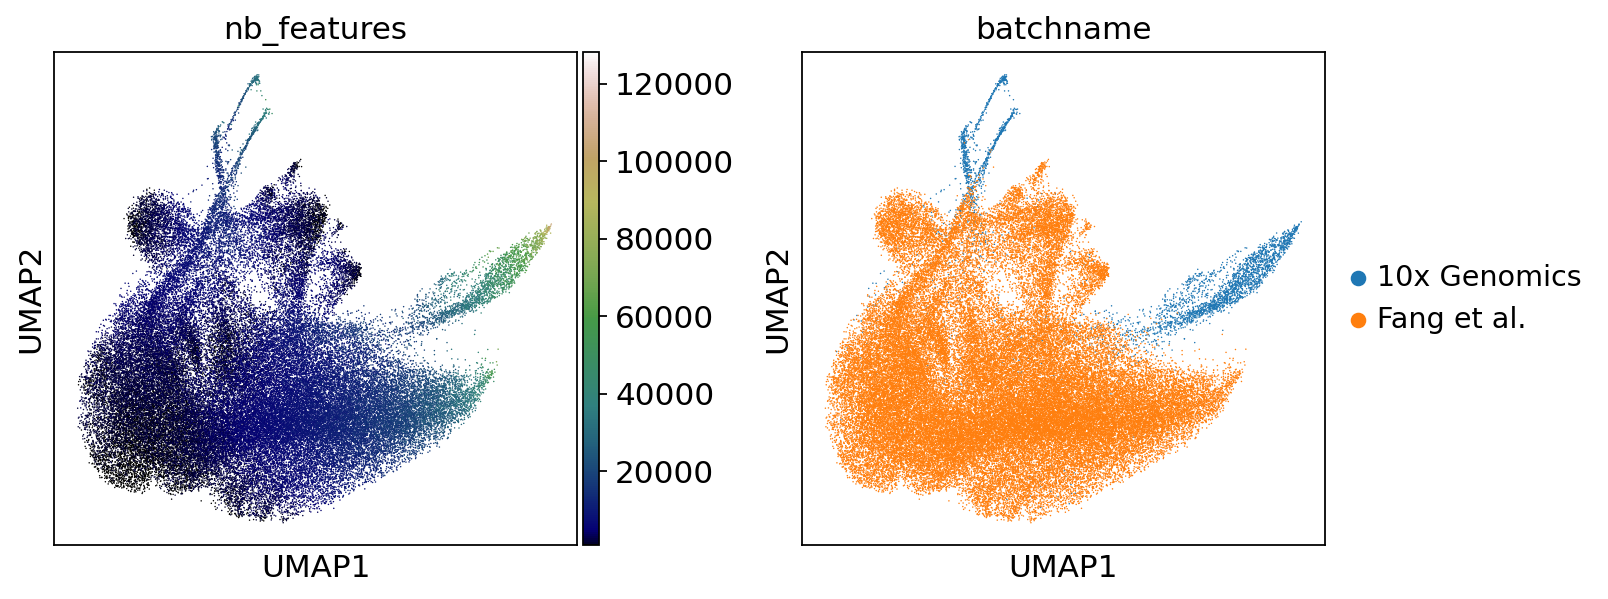

In [6]:
epi.pp.lazy(adatamerged)
sc.pl.umap(adatamerged, color=['nb_features', 'batchname'], wspace=0.3)

In [6]:
adatamerged = adatamerged.concatenate(adatacus)
adatamerged.obs['batchname'] = adatamerged.obs['batchname'].replace(np.nan, 'Cusanovich et al.', regex=False)
adatamerged

AnnData object with n_obs × n_vars = 86003 × 3580 
    obs: 'batch', 'batchname', 'batchname_Cusanovich', 'batchname_Fang', 'filter_barcode_cellranger', 'log_nb_features', 'nb_features'
    var: 'gene_id-0-0', 'transcript_id', 'gene_type', 'gene_name-0-0', 'transcript_type', 'transcript_name', 'protein_id-0-0', 'gene_id-1-0', 'gene_name-1-0', 'protein_id-1-0', 'gene_id-1', 'gene_name-1', 'protein_id-1'

In [9]:
adatamerged.layers['counts'] = adatamerged.X.copy()

... storing 'batchname' as categorical
... storing 'batchname_Cusanovich' as categorical
... storing 'batchname_Fang' as categorical
... storing 'filter_barcode_cellranger' as categorical


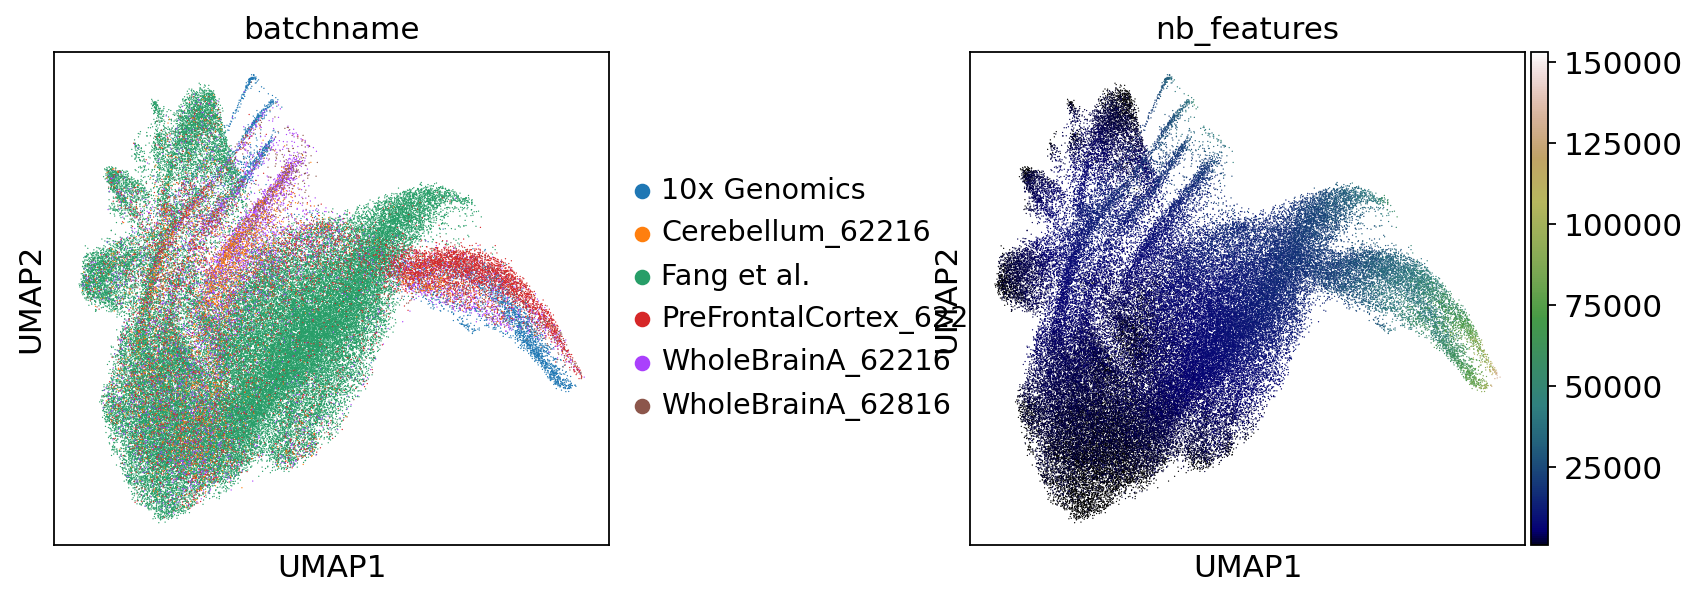

In [8]:
epi.pp.lazy(adatamerged)
sc.pl.umap(adatamerged, color=['batchname', 'nb_features'], wspace=0.5)

In [10]:
epi.pp.normalize_per_cell(adatamerged)
#epi.pp.lazy(adatamerged)
#sc.pl.umap(adatamerged, color=['nb_features', 'batchname'], wspace=0.3)

... storing 'batchname' as categorical
... storing 'batchname_Cusanovich' as categorical
... storing 'batchname_Fang' as categorical
... storing 'filter_barcode_cellranger' as categorical


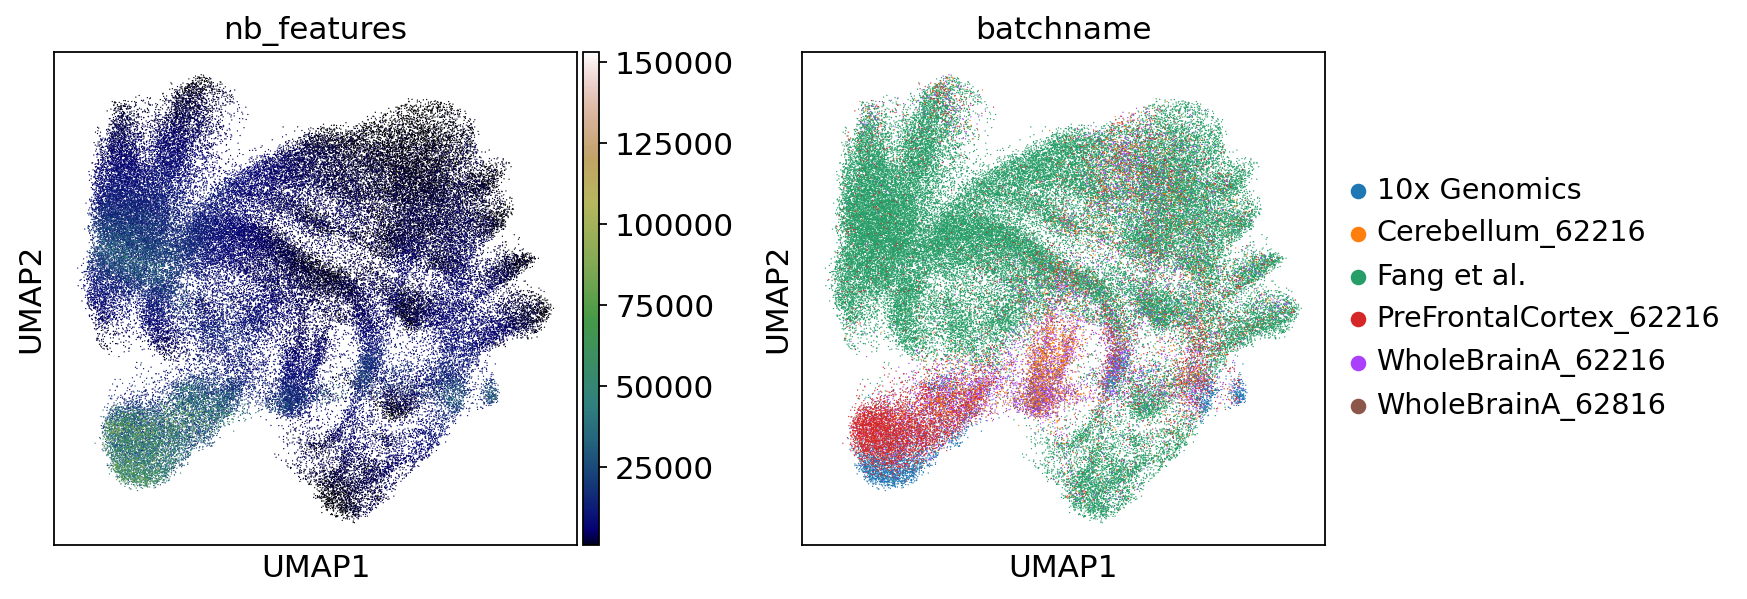

In [11]:
epi.pp.log1p(adatamerged)
epi.pp.lazy(adatamerged)
sc.pl.umap(adatamerged, color=['nb_features', 'batchname'], wspace=0.3)

In [12]:
adata = adatamerged.copy()

## Cell label

In [13]:
set(adata.obs['batchname'])

{'10x Genomics',
 'Cerebellum_62216',
 'Fang et al.',
 'PreFrontalCortex_62216',
 'WholeBrainA_62216',
 'WholeBrainA_62816'}

In [14]:
adata

AnnData object with n_obs × n_vars = 86003 × 3580 
    obs: 'batch', 'batchname', 'batchname_Cusanovich', 'batchname_Fang', 'filter_barcode_cellranger', 'log_nb_features', 'nb_features', 'n_counts'
    var: 'gene_id-0-0', 'transcript_id', 'gene_type', 'gene_name-0-0', 'transcript_type', 'transcript_name', 'protein_id-0-0', 'gene_id-1-0', 'gene_name-1-0', 'protein_id-1-0', 'gene_id-1', 'gene_name-1', 'protein_id-1'
    uns: 'log1p', 'pca', 'neighbors', 'umap', 'batchname_colors'
    obsm: 'X_pca', 'X_tsne', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'distances', 'connectivities'

In [15]:
annot = []
index = 0
for n in adata.obs_names.tolist():
    if adata.obs['batchname'][index] == '10x Genomics':
        annot.append('10x Genomics')
    elif adata.obs['batchname'][index] =='Cerebellum_62216':
        annot.append(' - '.join(['Cusanovich et al.', 'Cerebellum_62216']))
    elif adata.obs['batchname'][index] =='WholeBrainA_62216':
        annot.append(' - '.join(['Cusanovich et al.', 'WholeBrainA_62216']))
    elif adata.obs['batchname'][index] =='PreFrontalCortex_62216':
        annot.append(' - '.join(['Cusanovich et al.', 'PreFrontalCortex_62216']))
    elif adata.obs['batchname'][index] =='WholeBrainA_62816':
        annot.append(' - '.join(['Cusanovich et al.', 'WholeBrainA_62816']))
    elif adata.obs['batchname'][index] == 'Fang et al.':
        annot.append(' - '.join(['Fang et al.', adata.obs['batchname_Fang'][index]]))
    else:
        annot.append(n)
    index += 1
    
adata.obs['batchname_all'] = annot

In [16]:
set(adata.obs['batchname_all'])

{'10x Genomics',
 'Cusanovich et al. - Cerebellum_62216',
 'Cusanovich et al. - PreFrontalCortex_62216',
 'Cusanovich et al. - WholeBrainA_62216',
 'Cusanovich et al. - WholeBrainA_62816',
 'Fang et al. - CEMBA180226_1A',
 'Fang et al. - CEMBA180227_1A',
 'Fang et al. - CEMBA180305_2B',
 'Fang et al. - CEMBA180306_2B',
 'Fang et al. - CEMBA180308_3B',
 'Fang et al. - CEMBA180312_3B'}

In [17]:
adata_large = ad.read('/home/icb/anna.danese/integration_resubmission/large_dataset_merged_dataset_cell_label.h5ad')
adata_large

AnnData object with n_obs × n_vars = 84813 × 118723 
    obs: 'batch', 'batchname', 'batchname_Cusanovich', 'batchname_Fang', 'filter_barcode_cellranger', 'log_nb_features', 'nb_features', 'batchname_all', 'n_counts', 'final_cell_label'
    var: 'n_cells-0-0', 'commonness-0-0', 'prop_shared_cells-0-0', 'variability_score-0-0', 'n_cells-1-0', 'commonness-1-0', 'prop_shared_cells-1-0', 'variability_score-1-0', 'n_cells-1', 'commonness-1', 'prop_shared_cells-1', 'variability_score-1'
    uns: 'batchname_all_colors', 'batchname_colors', 'final_cell_label_colors', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_tsne', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [18]:
index = 0
annot_10x = {}
for cell in adata_large.obs_names.tolist():
    if adata_large.obs['batchname_all'][index] == '10x Genomics':
        annot_10x[cell.split('-')[0]] = adata_large.obs['final_cell_label'][index]
    index += 1

annot = []
for cell in adata.obs_names.tolist():
    if cell.split('-')[0] in annot_10x.keys():
        annot.append(annot_10x[cell.split('-')[0]])
    else:
        annot.append('NA')
adata.obs['annot_10x'] = annot 

#sc.pl.umap(adata, color=['batchname_all', 'annot_10x'], wspace=1)

In [19]:
index = 0
annot_fang = {}
for cell in adata_large.obs_names.tolist():
    if adata_large.obs['batchname_all'][index] == 'Fang et al. - CEMBA180226_1A':
        annot_fang[cell] = adata_large.obs['final_cell_label'][index]
    index += 1

annot = []
for cell in adata.obs_names.tolist():
    if cell in annot_fang.keys():
        annot.append(annot_fang[cell])
    else:
        annot.append('NA')
adata.obs['annot_fang'] = annot 

#sc.pl.umap(adata, color=['batchname_all', 'annot_fang'], wspace=1)

index = 0
annot_fang = {}
for cell in adata_large.obs_names.tolist():
    if adata_large.obs['batchname_all'][index] == 'Fang et al. - CEMBA180227_1A':
        annot_fang[cell] = adata_large.obs['final_cell_label'][index]
    index += 1

annot = []
for cell in adata.obs_names.tolist():
    if cell in annot_fang.keys():
        annot.append(annot_fang[cell])
    else:
        annot.append('NA')
adata.obs['annot_fang2'] = annot 

#sc.pl.umap(adata, color=['batchname_all', 'annot_fang2'], wspace=1)

index = 0
annot_fang = {}
for cell in adata_large.obs_names.tolist():
    if adata_large.obs['batchname_all'][index] == 'Fang et al. - CEMBA180305_2B':
        annot_fang[cell.split('-')[0]] = adata_large.obs['final_cell_label'][index]
    index += 1

annot = []
index = 0
for cell in adata.obs_names.tolist():
    if adata.obs['batchname_all'][index] == 'Fang et al. - CEMBA180305_2B':
        if cell.split('-')[0] in annot_fang.keys():
            annot.append(annot_fang[cell.split('-')[0]])
        else:
            annot.append('NA')
    else:
        annot.append('NA')
    index += 1
adata.obs['annot_fang3'] = annot 

#sc.pl.umap(adata, color=['batchname_all', 'annot_fang3'], wspace=1)


index = 0
annot_fang = {}
for cell in adata_large.obs_names.tolist():
    if adata_large.obs['batchname_all'][index] == 'Fang et al. - CEMBA180306_2B':
        annot_fang[cell] = adata_large.obs['final_cell_label'][index]
    index += 1

annot = []
for cell in adata.obs_names.tolist():
    if cell in annot_fang.keys():
        annot.append(annot_fang[cell])
    else:
        annot.append('NA')
adata.obs['annot_fang4'] = annot 

#sc.pl.umap(adata, color=['batchname_all', 'annot_fang4'], wspace=1)


index = 0
annot_fang = {}
for cell in adata_large.obs_names.tolist():
    if adata_large.obs['batchname_all'][index] == 'Fang et al. - CEMBA180308_3B':
        annot_fang[cell] = adata_large.obs['final_cell_label'][index]
    index += 1

annot = []
for cell in adata.obs_names.tolist():
    if cell in annot_fang.keys():
        annot.append(annot_fang[cell])
    else:
        annot.append('NA')
adata.obs['annot_fang5'] = annot 

#sc.pl.umap(adata, color=['batchname_all', 'annot_fang5'], wspace=1)


index = 0
annot_fang = {}
for cell in adata_large.obs_names.tolist():
    if adata_large.obs['batchname_all'][index] == 'Fang et al. - CEMBA180312_3B':
        annot_fang[cell] = adata_large.obs['final_cell_label'][index]
    index += 1

annot = []
for cell in adata.obs_names.tolist():
    if cell in annot_fang.keys():
        annot.append(annot_fang[cell])
    else:
        annot.append('NA')
adata.obs['annot_fang6'] = annot 

#sc.pl.umap(adata, color=['batchname_all', 'annot_fang6'], wspace=1)


index = 0
annot_cus = {}
for cell in adata_large.obs_names.tolist():
    if adata_large.obs['batchname_all'][index] == 'Cusanovich et al. - Cerebellum_62216':
        annot_cus[cell.split('-')[0]] = adata_large.obs['final_cell_label'][index]
    index += 1

annot = []
index = 0
for cell in adata.obs_names.tolist():
    if adata.obs['batchname_all'][index] == 'Cusanovich et al. - Cerebellum_62216':
        if cell.split('-')[0] in annot_cus.keys():
            annot.append(annot_cus[cell.split('-')[0]])
        else:
            annot.append('NA')
    else:
        annot.append('NA')
    index += 1
adata.obs['annot_cus'] = annot 

#sc.pl.umap(adata, color=['batchname_all', 'annot_cus'], wspace=1)


index = 0
annot_cus = {}
for cell in adata_large.obs_names.tolist():
    if adata_large.obs['batchname_all'][index] == 'Cusanovich et al. - PreFrontalCortex_62216':
        annot_cus[cell.split('-')[0]] = adata_large.obs['final_cell_label'][index]
    index += 1

annot = []
index = 0
for cell in adata.obs_names.tolist():
    if adata.obs['batchname_all'][index] == 'Cusanovich et al. - PreFrontalCortex_62216':
        if cell.split('-')[0] in annot_cus.keys():
            annot.append(annot_cus[cell.split('-')[0]])
        else:
            annot.append('NA')
    else:
        annot.append('NA')
    index += 1
adata.obs['annot_cus2'] = annot 

#sc.pl.umap(adata, color=['batchname_all', 'annot_cus2'], wspace=1)


index = 0
annot_cus = {}
for cell in adata_large.obs_names.tolist():
    if adata_large.obs['batchname_all'][index] == 'Cusanovich et al. - WholeBrainA_62216':
        annot_cus[cell.split('-')[0]] = adata_large.obs['final_cell_label'][index]
    index += 1

annot = []
index = 0
for cell in adata.obs_names.tolist():
    if adata.obs['batchname_all'][index] == 'Cusanovich et al. - WholeBrainA_62216':
        if cell.split('-')[0] in annot_cus.keys():
            annot.append(annot_cus[cell.split('-')[0]])
        else:
            annot.append('NA')
    else:
        annot.append('NA')
    index += 1
adata.obs['annot_cus3'] = annot 

#sc.pl.umap(adata, color=['batchname_all', 'annot_cus3'], wspace=1)


index = 0
annot_cus = {}
for cell in adata_large.obs_names.tolist():
    if adata_large.obs['batchname_all'][index] == 'Cusanovich et al. - WholeBrainA_62816':
        annot_cus[cell.split('-')[0]] = adata_large.obs['final_cell_label'][index]
    index += 1

annot = []
index = 0
for cell in adata.obs_names.tolist():
    if adata.obs['batchname_all'][index] == 'Cusanovich et al. - WholeBrainA_62816':
        if cell.split('-')[0] in annot_cus.keys():
            annot.append(annot_cus[cell.split('-')[0]])
        else:
            annot.append('NA')
    else:
        annot.append('NA')
    index += 1
adata.obs['annot_cus4'] = annot 

#sc.pl.umap(adata, color=['batchname_all', 'annot_cus4'], wspace=1)


In [20]:
index = 0
annot_fang = {}
for cell in adata_large.obs_names.tolist():
    if adata_large.obs['batchname_all'][index] == 'Fang et al. - CEMBA180305_2B':
        annot_fang[cell.split('-')[0]] = adata_large.obs['final_cell_label'][index]
    index += 1

annot = []
index = 0
for cell in adata.obs_names.tolist():
    if adata.obs['batchname_all'][index] == 'Fang et al. - CEMBA180305_2B':
        if cell.split('-')[0] in annot_fang.keys():
            annot.append(annot_fang[cell.split('-')[0]])
        else:
            annot.append('NA')
    else:
        annot.append('NA')
    index += 1
adata.obs['annot_fang3'] = annot 

#sc.pl.umap(adata, color=['batchname_all', 'annot_fang3'], wspace=1)




In [21]:
annot = []
index = 0
for cell in adata.obs_names.tolist():
    if adata.obs['annot_10x'][index] != 'NA':
        annot.append(adata.obs['annot_10x'][index])
        
    elif adata.obs['annot_fang'][index] != 'NA':
        annot.append(adata.obs['annot_fang'][index])
    elif adata.obs['annot_fang2'][index] != 'NA':
        annot.append(adata.obs['annot_fang2'][index])
    elif adata.obs['annot_fang3'][index] != 'NA':
        annot.append(adata.obs['annot_fang3'][index])
    elif adata.obs['annot_fang4'][index] != 'NA':
        annot.append(adata.obs['annot_fang4'][index])
    elif adata.obs['annot_fang5'][index] != 'NA':
        annot.append(adata.obs['annot_fang5'][index])
    elif adata.obs['annot_fang6'][index] != 'NA':
        annot.append(adata.obs['annot_fang6'][index])
        
    elif adata.obs['annot_cus'][index] != 'NA':
        annot.append(adata.obs['annot_cus'][index])
    elif adata.obs['annot_cus2'][index] != 'NA':
        annot.append(adata.obs['annot_cus2'][index])
    elif adata.obs['annot_cus3'][index] != 'NA':
        annot.append(adata.obs['annot_cus3'][index])
    elif adata.obs['annot_cus4'][index] != 'NA':
        annot.append(adata.obs['annot_cus4'][index])
    
    else:
        annot.append('NA')

    index += 1

adata.obs['all_cell_annot'] = annot
#sc.pl.umap(adata, color=['batchname', 'batchname_all', 'all_cell_annot'], wspace=1)

In [22]:
pd.crosstab(adata.obs['batchname_all'], adata.obs['all_cell_annot'])

all_cell_annot                              Astrocytes  \
batchname_all                                            
10x Genomics                                       357   
Cusanovich et al. - Cerebellum_62216               445   
Cusanovich et al. - PreFrontalCortex_62216         627   
Cusanovich et al. - WholeBrainA_62216              508   
Cusanovich et al. - WholeBrainA_62816              423   
Fang et al. - CEMBA180226_1A                      1565   
Fang et al. - CEMBA180227_1A                      1534   
Fang et al. - CEMBA180305_2B                      1142   
Fang et al. - CEMBA180306_2B                      1020   
Fang et al. - CEMBA180308_3B                      1209   
Fang et al. - CEMBA180312_3B                      1301   

all_cell_annot                              Cerebellar Granule Cells  \
batchname_all                                                          
10x Genomics                                                       0   
Cusanovich et al. - Cerebellum_62216                            1096   
Cusanovich et al. - PreFrontalCortex_62216                         6   
Cusanovich et al. - WholeBrainA_62216                           2063   
Cusanovich et al. - WholeBrainA_62816                           1076   
Fang et al. - CEMBA180226_1A                                       0   
Fang et al. - CEMBA180227_1A                                       0   
Fang et al. - CEMBA180305_2B                                       0   
Fang et al. - CEMBA180306_2B                                       0   
Fang et al. - CEMBA180308_3B                                       0   
Fang et al. - CEMBA180312_3B                                       0   

all_cell_annot                              Endothelial Cells  \
batchname_all                                                   
10x Genomics                                               81   
Cusanovich et al. - Cerebellum_62216                      112   
Cusanovich et al. - PreFrontalCortex_62216                127   
Cusanovich et al. - WholeBrainA_62216                     129   
Cusanovich et al. - WholeBrainA_62816                     112   
Fang et al. - CEMBA180226_1A                             1069   
Fang et al. - CEMBA180227_1A                             1053   
Fang et al. - CEMBA180305_2B                              327   
Fang et al. - CEMBA180306_2B                              293   
Fang et al. - CEMBA180308_3B                              288   
Fang et al. - CEMBA180312_3B                              393   

all_cell_annot                              Excitatory Neurons  \
batchname_all                                                    
10x Genomics                                              2038   
Cusanovich et al. - Cerebellum_62216                        14   
Cusanovich et al. - PreFrontalCortex_62216                3520   
Cusanovich et al. - WholeBrainA_62216                      857   
Cusanovich et al. - WholeBrainA_62816                      533   
Fang et al. - CEMBA180226_1A                              5028   
Fang et al. - CEMBA180227_1A                              4629   
Fang et al. - CEMBA180305_2B                              5158   
Fang et al. - CEMBA180306_2B                              5556   
Fang et al. - CEMBA180308_3B                              5078   
Fang et al. - CEMBA180312_3B                              4589   

all_cell_annot                              Inhibitory Neurons  Microglia  \
batchname_all                                                               
10x Genomics                                               669        420   
Cusanovich et al. - Cerebellum_62216                       499        150   
Cusanovich et al. - PreFrontalCortex_62216                1123        475   
Cusanovich et al. - WholeBrainA_62216                     1454        696   
Cusanovich et al. - WholeBrainA_62816                      612        482   
Fang et al. - CEMBA180226_1A                              2259  

... storing 'batchname_all' as categorical
... storing 'annot_10x' as categorical
... storing 'annot_fang' as categorical
... storing 'annot_fang2' as categorical
... storing 'annot_fang3' as categorical
... storing 'annot_fang4' as categorical
... storing 'annot_fang5' as categorical
... storing 'annot_fang6' as categorical
... storing 'annot_cus' as categorical
... storing 'annot_cus2' as categorical
... storing 'annot_cus3' as categorical
... storing 'annot_cus4' as categorical
... storing 'all_cell_annot' as categorical


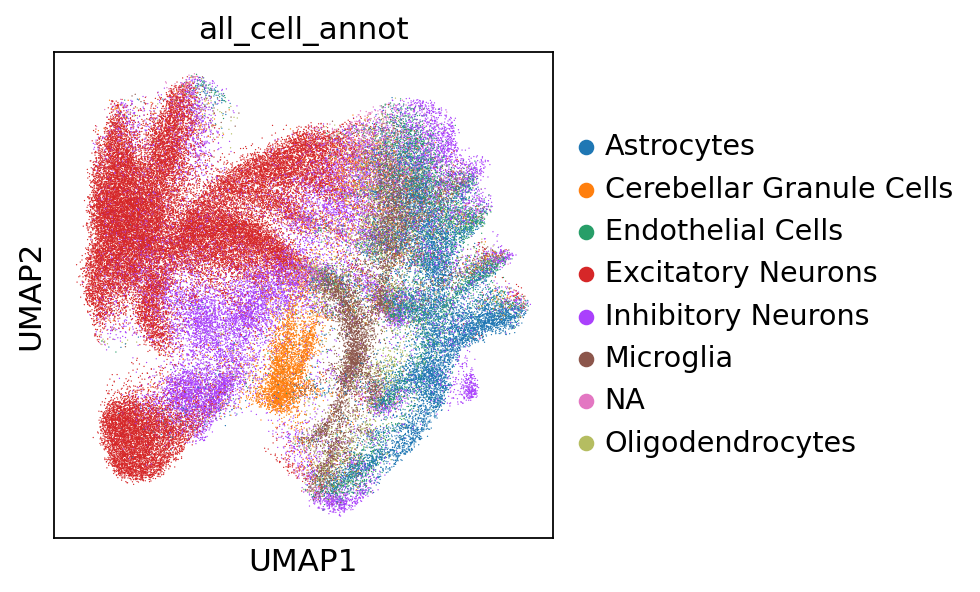

In [23]:
sc.pl.umap(adata, color=['all_cell_annot'])

... storing 'all_cell_annot' as categorical


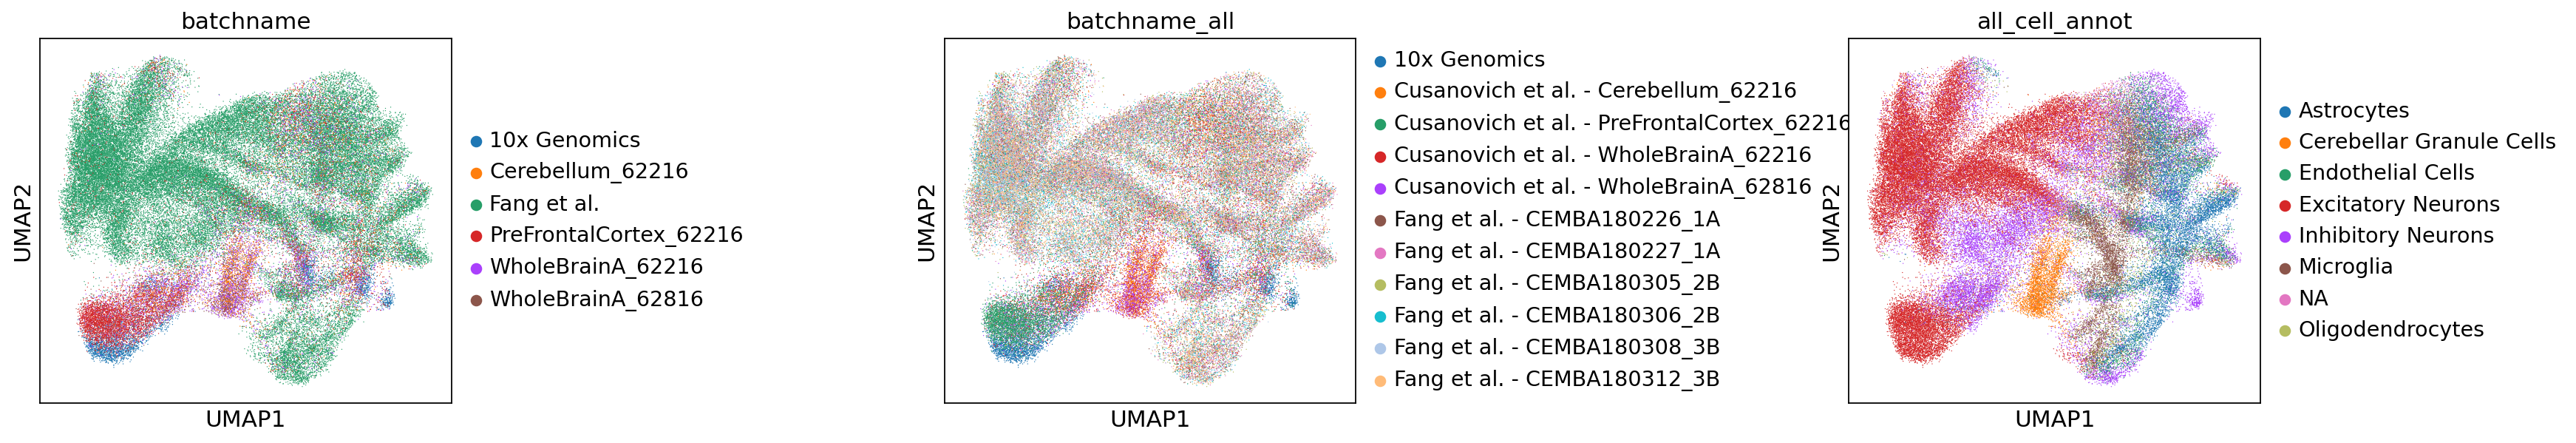

In [23]:
annot = []
index = 0
for cell in adata.obs_names.tolist():
    if adata.obs['annot_10x'][index] != 'NA':
        annot.append(adata.obs['annot_10x'][index])
        
    elif adata.obs['annot_fang'][index] != 'NA':
        annot.append(adata.obs['annot_fang'][index])
    elif adata.obs['annot_fang2'][index] != 'NA':
        annot.append(adata.obs['annot_fang2'][index])
    elif adata.obs['annot_fang3'][index] != 'NA':
        annot.append(adata.obs['annot_fang3'][index])
    elif adata.obs['annot_fang4'][index] != 'NA':
        annot.append(adata.obs['annot_fang4'][index])
    elif adata.obs['annot_fang5'][index] != 'NA':
        annot.append(adata.obs['annot_fang5'][index])
    elif adata.obs['annot_fang6'][index] != 'NA':
        annot.append(adata.obs['annot_fang6'][index])
        
    elif adata.obs['annot_cus'][index] != 'NA':
        annot.append(adata.obs['annot_cus'][index])
    elif adata.obs['annot_cus2'][index] != 'NA':
        annot.append(adata.obs['annot_cus2'][index])
    elif adata.obs['annot_cus3'][index] != 'NA':
        annot.append(adata.obs['annot_cus3'][index])
    elif adata.obs['annot_cus4'][index] != 'NA':
        annot.append(adata.obs['annot_cus4'][index])
    
    else:
        annot.append('NA')

    index += 1

adata.obs['all_cell_annot'] = annot
sc.pl.umap(adata, color=['batchname', 'batchname_all', 'all_cell_annot'], wspace=1)

In [24]:
pd.crosstab(adata.obs['batchname_all'], adata.obs['all_cell_annot'])

all_cell_annot                              Astrocytes  \
batchname_all                                            
10x Genomics                                       357   
Cusanovich et al. - Cerebellum_62216               445   
Cusanovich et al. - PreFrontalCortex_62216         627   
Cusanovich et al. - WholeBrainA_62216              508   
Cusanovich et al. - WholeBrainA_62816              423   
Fang et al. - CEMBA180226_1A                      1565   
Fang et al. - CEMBA180227_1A                      1534   
Fang et al. - CEMBA180305_2B                      1142   
Fang et al. - CEMBA180306_2B                      1020   
Fang et al. - CEMBA180308_3B                      1209   
Fang et al. - CEMBA180312_3B                      1301   

all_cell_annot                              Cerebellar Granule Cells  \
batchname_all                                                          
10x Genomics                                                       0   
Cusanovich et al. - Cerebellum_62216                            1096   
Cusanovich et al. - PreFrontalCortex_62216                         6   
Cusanovich et al. - WholeBrainA_62216                           2063   
Cusanovich et al. - WholeBrainA_62816                           1076   
Fang et al. - CEMBA180226_1A                                       0   
Fang et al. - CEMBA180227_1A                                       0   
Fang et al. - CEMBA180305_2B                                       0   
Fang et al. - CEMBA180306_2B                                       0   
Fang et al. - CEMBA180308_3B                                       0   
Fang et al. - CEMBA180312_3B                                       0   

all_cell_annot                              Endothelial Cells  \
batchname_all                                                   
10x Genomics                                               81   
Cusanovich et al. - Cerebellum_62216                      112   
Cusanovich et al. - PreFrontalCortex_62216                127   
Cusanovich et al. - WholeBrainA_62216                     129   
Cusanovich et al. - WholeBrainA_62816                     112   
Fang et al. - CEMBA180226_1A                             1069   
Fang et al. - CEMBA180227_1A                             1053   
Fang et al. - CEMBA180305_2B                              327   
Fang et al. - CEMBA180306_2B                              293   
Fang et al. - CEMBA180308_3B                              288   
Fang et al. - CEMBA180312_3B                              393   

all_cell_annot                              Excitatory Neurons  \
batchname_all                                                    
10x Genomics                                              2038   
Cusanovich et al. - Cerebellum_62216                        14   
Cusanovich et al. - PreFrontalCortex_62216                3520   
Cusanovich et al. - WholeBrainA_62216                      857   
Cusanovich et al. - WholeBrainA_62816                      533   
Fang et al. - CEMBA180226_1A                              5028   
Fang et al. - CEMBA180227_1A                              4629   
Fang et al. - CEMBA180305_2B                              5158   
Fang et al. - CEMBA180306_2B                              5556   
Fang et al. - CEMBA180308_3B                              5078   
Fang et al. - CEMBA180312_3B                              4589   

all_cell_annot                              Inhibitory Neurons  Microglia  \
batchname_all                                                               
10x Genomics                                               669        420   
Cusanovich et al. - Cerebellum_62216                       499        150   
Cusanovich et al. - PreFrontalCortex_62216                1123        475   
Cusanovich et al. - WholeBrainA_62216                     1454        696   
Cusanovich et al. - WholeBrainA_62816                      612        482   
Fang et al. - CEMBA180226_1A                              2259  

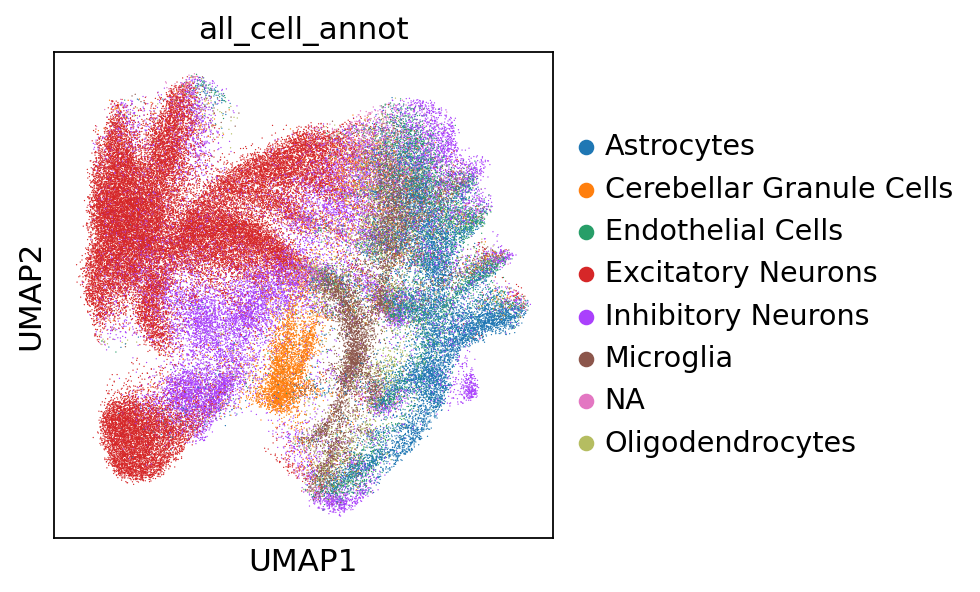

In [24]:
sc.pl.umap(adata, color=['all_cell_annot'])

In [25]:
adata = adata[adata.obs['all_cell_annot']!='NA',:].copy()
adata

AnnData object with n_obs × n_vars = 84813 × 3580 
    obs: 'batch', 'batchname', 'batchname_Cusanovich', 'batchname_Fang', 'filter_barcode_cellranger', 'log_nb_features', 'nb_features', 'n_counts', 'batchname_all', 'annot_10x', 'annot_fang', 'annot_fang2', 'annot_fang3', 'annot_fang4', 'annot_fang5', 'annot_fang6', 'annot_cus', 'annot_cus2', 'annot_cus3', 'annot_cus4', 'all_cell_annot'
    var: 'gene_id-0-0', 'transcript_id', 'gene_type', 'gene_name-0-0', 'transcript_type', 'transcript_name', 'protein_id-0-0', 'gene_id-1-0', 'gene_name-1-0', 'protein_id-1-0', 'gene_id-1', 'gene_name-1', 'protein_id-1'
    uns: 'log1p', 'pca', 'neighbors', 'umap', 'batchname_colors', 'all_cell_annot_colors'
    obsm: 'X_pca', 'X_tsne', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'distances', 'connectivities'

In [26]:
adata.obs['final_cell_label'] = adata.obs['all_cell_annot'].copy()

In [28]:
#del adata.obs['annot_10x'], adata.obs['annot_fang'], adata.obs['annot_fang2'], adata.obs['annot_fang3']
#del adata.obs['annot_fang4'], adata.obs['annot_fang5'], adata.obs['annot_fang6'], adata.obs['annot_cu3s']
#del adata.obs['annot_cus2'], adata.obs['annot_cus3'], adata.obs['annot_cus4'], adata.obs['all_cell_annot']

#del adata.uns['annot_10x_colors'], adata.uns['annot_fang_colors'], adata.uns['annot_fang2_colors'], adata.uns['annot_fang3_colors']
del adata.uns['annot_fang4_colors'], adata.uns['annot_fang5_colors'], adata.uns['annot_fang6_colors'], adata.uns['annot_cus_colors']
del adata.uns['annot_cus2_colors'], adata.uns['annot_cus3_colors'], adata.uns['annot_cus4_colors'], adata.uns['all_cell_annot_colors']

KeyError: 'annot_fang4_colors'

In [29]:
epi.pp.lazy(adata)

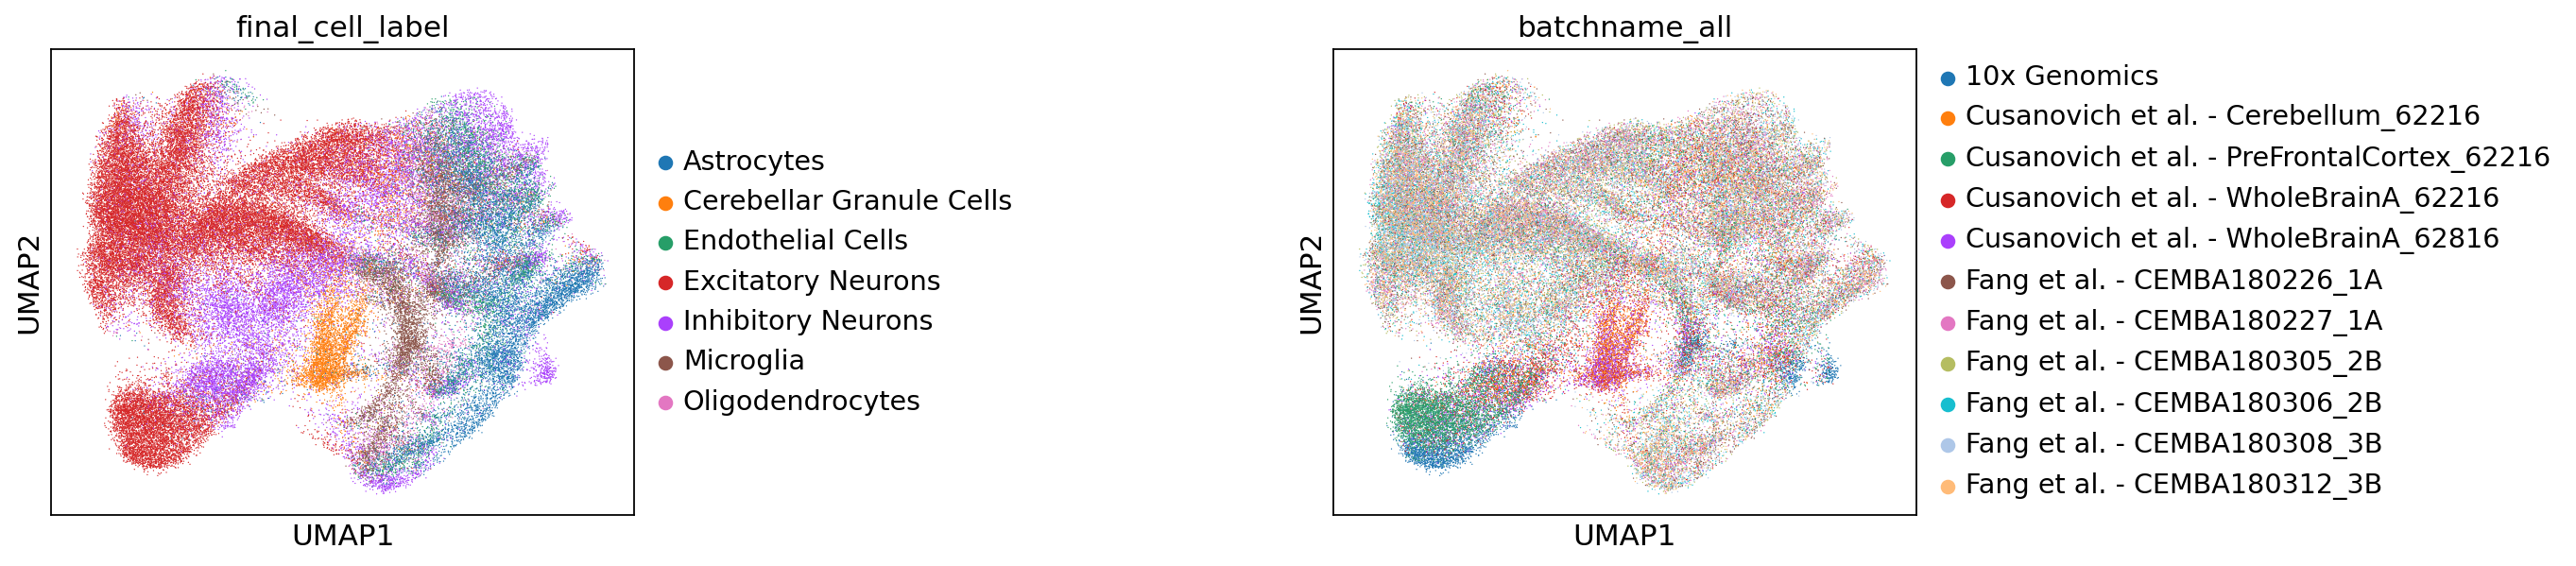

In [30]:
sc.pl.umap(adata, color=[ 'final_cell_label', 'batchname_all'], wspace=1)

In [31]:
adata.write('/home/icb/anna.danese/integration_resubmission/large_gene_activity_dataset_merged_dataset_cell_label.h5ad')

In [54]:
adata = ad.read('/home/icb/anna.danese/integration_resubmission/large_gene_activity_dataset_merged_dataset_cell_label.h5ad')

In [55]:
adata

AnnData object with n_obs × n_vars = 84813 × 3580 
    obs: 'batch', 'batchname', 'batchname_Cusanovich', 'batchname_Fang', 'filter_barcode_cellranger', 'log_nb_features', 'nb_features', 'n_counts', 'batchname_all', 'final_cell_label'
    var: 'gene_id-0-0', 'transcript_id', 'gene_type', 'gene_name-0-0', 'transcript_type', 'transcript_name', 'protein_id-0-0', 'gene_id-1-0', 'gene_name-1-0', 'protein_id-1-0', 'gene_id-1', 'gene_name-1', 'protein_id-1'
    uns: 'batchname_all_colors', 'batchname_colors', 'final_cell_label_colors', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_tsne', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

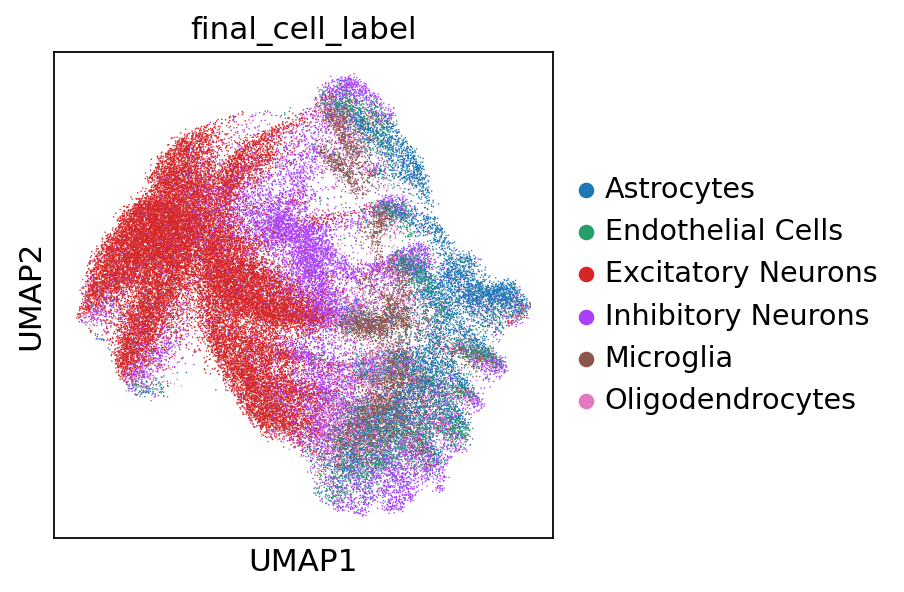

In [57]:
adata10x = adata[adata.obs['batchname']=='Fang et al.',:].copy()
epi.pp.lazy(adata10x)
sc.pl.umap(adata10x, color=['final_cell_label'])


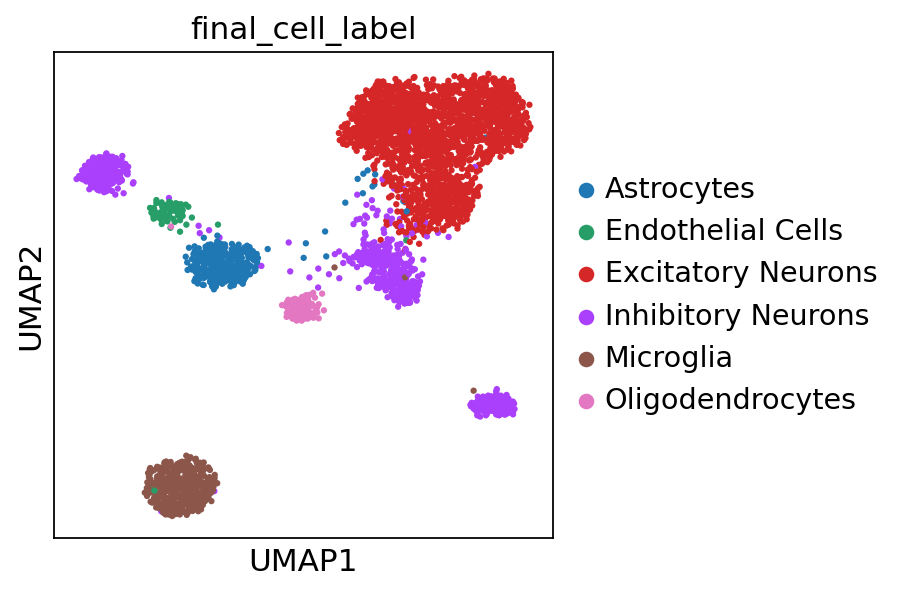

In [59]:
adata10x = adata[adata.obs['batchname']=='10x Genomics',:].copy()
epi.pp.lazy(adata10x)
sc.pl.umap(adata10x, color=['final_cell_label'])

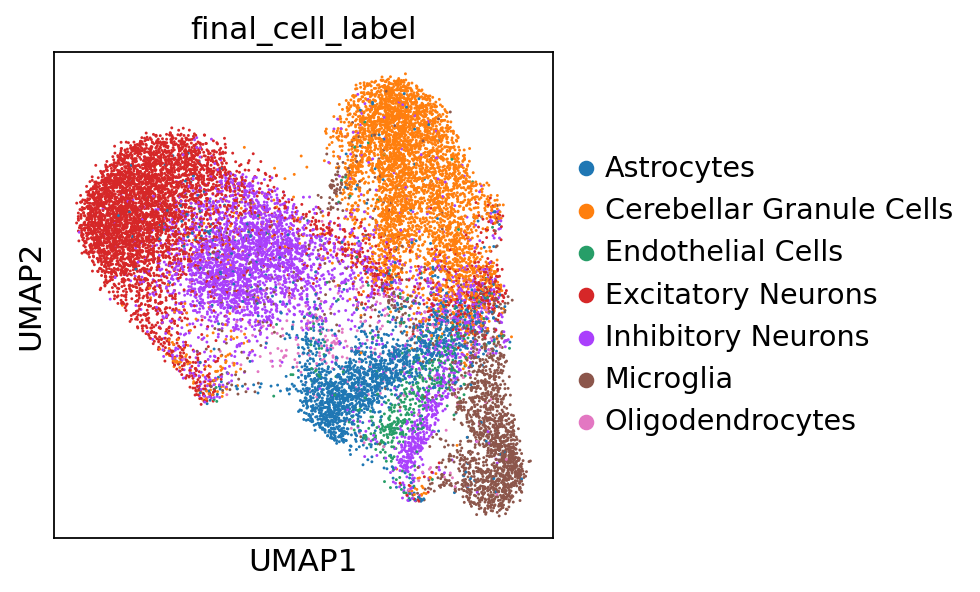

In [58]:
adata10x = adata[adata.obs['batchname']!='10x Genomics',:].copy()
adata10x = adata10x[adata10x.obs['batchname']!='Fang et al.',:].copy()
epi.pp.lazy(adata10x)
sc.pl.umap(adata10x, color=['final_cell_label'])
